# Receptive field mapping notebook

This notebook demonstrates the following:
- Reading data from an NWB file
- Inspecting visual stimulus trial info
- Aligning spike times to create receptive field maps

In [1]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from hdmf_zarr import NWBZarrIO
from nwbwidgets import nwb2widget

## Reading data from an NWB file

First, we find the NWB file of interest:

In [3]:
mouse_id = '634569'

nwb_file = glob.glob(os.path.join('/data','*' + mouse_id + '*', '*', '*.nwb.zarr'))[1]

print(nwb_file)

/data/ecephys_634569_2022-08-09_16-14-38_nwb/ecephys_634569_2022-08-09_16-14-38_nwb/ecephys_634569_2022-08-09_16-14-38_experiment1_recording1.nwb.zarr


In [12]:
io = NWBZarrIO(nwb_file, "r")
nwbfile_read = io.read()
nwb2widget(nwbfile_read)

Read in the electrodes table as a Pandas `DataFrame`:

In [5]:
electrodes = nwbfile_read.electrodes[:]

In [6]:
electrodes

,location,group,group_name,channel_name,offset_to_uV,rel_y,gain_to_uV,rel_x,inter_sample_shift
id,,,,,,,,,
0,unknown,{'description': 'Recorded electrodes from prob...,Probe A,AP1,0.0,0.0,0.195,16.0,0.000000
1,unknown,{'description': 'Recorded electrodes from prob...,Probe A,AP2,0.0,0.0,0.195,48.0,0.000000
2,unknown,{'description': 'Recorded electrodes from prob...,Probe A,AP3,0.0,20.0,0.195,0.0,0.083333
3,unknown,{'description': 'Recorded electrodes from prob...,Probe A,AP4,0.0,20.0,0.195,32.0,0.083333
4,unknown,{'description': 'Recorded electrodes from prob...,Probe A,AP5,0.0,40.0,0.195,16.0,0.166667
...,...,...,...,...,...,...,...,...,...
763,unknown,{'description': 'Recorded electrodes from prob...,Probe B,AP380,0.0,1974.0,0.195,30.0,0.750000
764,unknown,{'description': 'Recorded electrodes from prob...,Probe B,AP381,0.0,282.0,0.195,30.0,0.833333
765,unknown,{'description': 'Recorded electrodes from prob...,Probe B,AP382,0.0,816.0,0.195,30.0,0.833333


Read in the units table as a Pandas `DataFrame`:

In [7]:
units = nwbfile_read.units[:]

In [8]:
units.head()

,spike_times,electrodes,waveform_mean,waveform_sd,unit_name,firing_rate,repolarization_slope,peak_trough_ratio,isolation_distance,num_spikes,...,d_prime,half_width,l_ratio,amplitude_cutoff,isi_violations_ratio,default_qc,ks_unit_id,device_name,presence_ratio,recovery_slope
id,,,,,,,,,,,,,,,,,,,,,
0,"[1409.5167179658397, 1413.1409575111002, 1417....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-1.605825, -1.4693245, -0.8346, -1.2899247, ...","[[14.559671, 16.585423, 16.982037, 16.319572, ...",5aed5d26-8f35-4d22-823e-3dcc1cc41e1b,0.171154,7.977382e+05,-0.388667,1.739489e+02,298.0,...,3.547286,0.000150,1.143005e-02,0.001294,0.000000,True,0.0,Probe A,0.88,-61180.128684
1,"[1407.1153316410632, 1407.138067054054, 1407.1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.9252751, 0.80437464, 1.4332498, 1.3113748,...","[[14.1849165, 17.333786, 17.493834, 19.209429,...",bd13e013-8815-4f4a-97e5-7cf079c7e370,17.317541,2.051976e+05,-0.338640,2.862200e+02,30152.0,...,6.970952,0.000253,1.968378e-06,0.001294,0.006384,True,1.0,Probe A,1.00,-8782.298063
2,"[1407.1844379622992, 1407.2181743815493, 1407....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.15014994, 0.6805494, 0.2739753, -0.9447751...","[[14.664293, 16.240294, 15.665979, 15.734182, ...",ff1f311e-2565-42f9-b913-99445bcc1183,5.509082,9.256922e+05,-0.549098,3.821324e+02,9592.0,...,11.089380,0.000140,0.000000e+00,0.040431,0.006308,True,2.0,Probe A,1.00,-101428.996989
3,"[1475.3232000576286, 1546.5155494343978, 1650....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-3.5831246, 0.70687485, -5.459999, -5.80125,...","[[22.367046, 24.714651, 20.079792, 12.152251, ...",714e14b4-6721-4739-865b-a9130a04277d,0.004595,4.332504e+05,-0.598861,8.905999e+14,8.0,...,2.981171,0.000810,NaN,0.500000,0.000000,False,3.0,Probe A,0.08,-107776.516584
4,"[1437.0925134996776, 1448.2511943941793, 1457....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-1.3133249, -1.6302, -1.4810251, -1.2947998,...","[[14.052446, 15.003727, 16.256788, 15.854149, ...",3a80999a-3074-425a-a817-401b559c3248,5.560199,2.428927e+06,-0.271901,3.997401e+02,9681.0,...,9.914046,0.000087,7.998396e-13,0.001294,0.086695,True,4.0,Probe A,0.96,-64280.316544


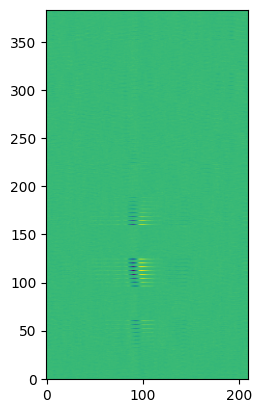

In [9]:
plt.imshow(units.waveform_mean[623].T, origin='lower')

In [11]:
units.device_name.loc[623]

'Probe B'

This unit was recorded with a Neuropixels Ultra probe, which has a non-standard electrode mapping. We have to re-order the channels before plotting.

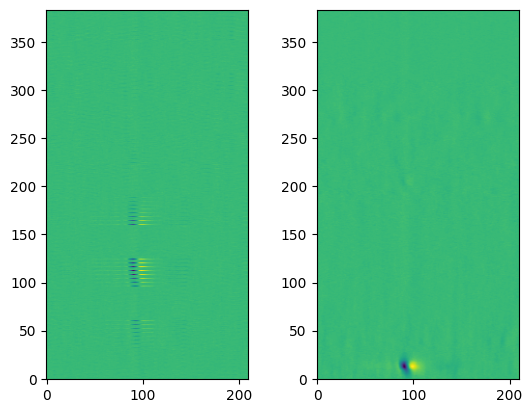

In [10]:
plt.subplot(121)
plt.imshow(units.waveform_mean[623].T, origin='lower')

electrodes_y_pos = electrodes["rel_y"].values[units.electrodes[623]]
order = np.argsort(electrodes_y_pos)
waveform_mean = units.waveform_mean[623][:]
plt.subplot(122)
plt.imshow(waveform_mean.T[order], origin='lower')

Note that the waveform looks smoother than that of the Neuropixels Opto or Neuropixels 1.0 probes, due to the 6 micron vs. 20 micron spacing between rows of electrodes.

## Visual stimulus info

Let's read in the trials table for the Gabor stimulus. This consists of a series of circular drifting gratings presented at different locations on the screen for 250 ms each.

In [11]:
trials = nwbfile_read.trials[:]

In [12]:
trials.head()

,start_time,stop_time,diameter,x_position,y_position,contrast,spatial_frequency,temporal_frequency,direction
id,,,,,,,,,
0,1446.933133,1447.183133,20.0,-40.0,-20.0,0.8,0.08,4.0,90.0
1,1447.446900,1447.696900,20.0,-30.0,40.0,0.8,0.08,4.0,45.0
2,1447.980333,1448.230333,20.0,-20.0,10.0,0.8,0.08,4.0,90.0
3,1448.514000,1448.764000,20.0,-20.0,30.0,0.8,0.08,4.0,0.0
4,1449.047200,1449.297200,20.0,10.0,10.0,0.8,0.08,4.0,45.0


The most important parameters are `x_position` and `y_position`, which specify where on the screen the stimulus was located on a given trial

In [13]:
x_pos = np.sort(trials.x_position.unique())

In [14]:
x_pos

array([-40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.])

In [15]:
y_pos = np.sort(trials.y_position.unique())

In [16]:
y_pos

array([-40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.])

## Aligning spike times to create a receptive field map

We'll compute the firing rate of a unit for each stimulus location, and then plot it as a 2D histogram.

In [17]:
units_passing_qc = units[units.default_qc=='True']

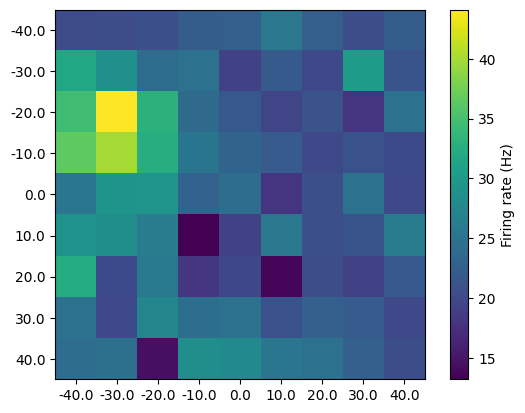

In [18]:
unit_index = 64

spikes = units_passing_qc.spike_times.loc[unit_index]
rf = np.empty((len(x_pos),len(y_pos)))
for i,x in enumerate(x_pos):
    for j,y in enumerate(y_pos):
        subset = trials[(trials.x_position==x)&(trials.y_position==y)]
        fr = []
        for ind,row in subset.iterrows():
            fr.append(len(spikes[(spikes>row.start_time)&(spikes<row.stop_time)])
                      / (row.stop_time-row.start_time))
        rf[i,j] = np.mean(fr)
plt.imshow(rf.T)
plt.xticks(range(9), x_pos);
plt.yticks(range(9), y_pos);
cbar = plt.colorbar()
cbar.set_label("Firing rate (Hz)")

This unit has a receptive field in the upper left corner of the screen. Because the screen covers the right visual hemifield, this means the receptive field is in front of the mouse, about 20º above the horizon.

Some interesting questions to explore:

- What fraction of units have clear receptive fields?
- How does receptive field location vary along the length of the probe?
- How can we classify receptive fields as real vs. noise?
- Do any units with receptive fields show evidence of direction tuning?